### Описание проекта 
Мобильный оператор предлагает два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
#### Тариф «Смарт»
Ежемесячная плата: 550 рублей <br>
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 3 рубля<br>
сообщение: 3 рубля<br>
1 Гб интернет-трафика: 200 рублей<br>
#### Тариф «Ультра»
Ежемесячная плата: 1950 рублей<br>
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 1 рубль<br>
сообщение: 1 рубль<br>
1 Гб интернет-трафика: 150 рублей<br>
<br>
Обратите внимание: оператор всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Описание данных
#### Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя<br>
first_name — имя пользователя<br>
last_name — фамилия пользователя<br>
age — возраст пользователя (годы)<br>
reg_date — дата подключения тарифа (день, месяц, год)<br>
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
city — город проживания пользователя<br>
tariff — название тарифного плана<br>
#### Таблица calls (информация о звонках):
id — уникальный номер звонка<br>
call_date — дата звонка<br>
duration — длительность звонка в минутах<br>
user_id — идентификатор пользователя, сделавшего звонок<br>
#### Таблица messages (информация о сообщениях):
id — уникальный номер сообщения<br>
message_date — дата сообщения<br>
user_id — идентификатор пользователя, отправившего сообщение<br>
#### Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии<br>
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
session_date — дата интернет-сессии<br>
user_id — идентификатор пользователя<br>
#### Таблица tariffs (информация о тарифах):
tariff_name — название тарифа<br>
rub_monthly_fee — ежемесячная абонентская плата в рублях<br>
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br>
messages_included — количество сообщений в месяц, включённых в абонентскую плату<br>
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br>
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)<br>

### Цель проекта

Проверить гипотезы: <br>
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

### Содержание
[](#)<br>
[](#)<br>
[](#)<br>
[](#)<br>
[](#)<br>

# 1. Общая информация

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
users = pd.read_csv('users.csv')
calls = pd.read_csv('calls.csv')
messages = pd.read_csv('messages.csv')
internet = pd.read_csv('internet.csv')
tariffs = pd.read_csv('tariffs.csv')

In [3]:
print('users:')
display(users.head())
users.info()

print('\ncalls:')
display(calls.head())
calls.info()

users:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

calls:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
print('messages:')
display(messages.head())
messages.info()

print('\ninternet:')
display(internet.head())
internet.info()

print('\ntarrifs:')
display(tariffs)
tariffs.info()

messages:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

internet:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

tarrifs:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод
Имеются пропуски в файле users в стобце 'churn_date', они объясняются тем, что тарифный план на момент выгрузки данных действителен. Дата в файлах указана в неверном формате. Значения минут и мегабайтов представлены вещественным типом данных. Имеются звонки продолжительностью 0 минут.  

# 2. Предобработка данных

- Изменим формат хранения времени 
- Добавим столбцы, которые будут хранить месяц и год каждого действия, для последующей группировки
- Пропуски в столбце 'churn_date' заменим нетипичным значением -1
- Длительность звонков и количество использованных мегабайтов округлим вверх

In [ ]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [ ]:
calls['month_year'] = calls['call_date'].dt.month.astype('str') + '-' + calls['call_date'].dt.year.astype('str')
calls['month_year'] = pd.to_datetime(calls['month_year'], format = '%m-%Y')
messages['month_year'] = messages['message_date'].dt.month.astype('str') + '-' + messages['message_date'].dt.year.astype('str')
messages['month_year'] = pd.to_datetime(messages['month_year'], format = '%m-%Y')
internet['month_year'] = internet['session_date'].dt.month.astype('str') + '-' + internet['session_date'].dt.year.astype('str')
internet['month_year'] = pd.to_datetime(internet['month_year'], format = '%m-%Y')

In [ ]:
users['churn_date'] = users['churn_date'].fillna(-1)

In [5]:
calls['duration'] = calls['duration'].apply(math.ceil)
internet['mb_used'] = internet['mb_used'].apply(math.ceil)

# 3. Подготовка даннных 
Подготовим данные к анализу, сведя все файлы к одной таблице, в которой будут храниться все необхбдимые для исследования данные

Cоздадим датафрейм на основе файла users, который будет содержать id абонента, его город и тип используемого тарифа

In [ ]:
id_dict = users.loc[:, ['user_id', 'city', 'tariff']]
display(id_dict.head())

Присоеденим получившуюся таблицу к файлам, которые в дальнейшем объединим

In [6]:
calls = calls.merge(id_dict, on = 'user_id', how = 'left')
messages = messages.merge(id_dict, on = 'user_id', how = 'left')
internet = internet.merge(id_dict, on = 'user_id', how = 'left')

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


Создадим сводные таблицы для звонков, смс и интернета, индексами в которых будут 'user_id', 'city', 'tariff' и 'month_year' для последующего их объединения.

In [7]:
calls_pivot = calls.pivot_table(index = ['user_id', 'city', 'tariff', 'month_year'], values = 'duration', aggfunc = ['sum', 'count'])
calls_pivot = calls_pivot.astype('Int64')
calls_pivot.columns = ['calls_sum', 'calls_count']
display(calls_pivot.head())

calls_sum  calls_count
user_id city      tariff month_year                        
1000    Краснодар ultra  2018-05-01        159           22
                         2018-06-01        172           43
                         2018-07-01        340           47
                         2018-08-01        408           52
                         2018-09-01        466           58

In [8]:
messages_pivot = messages.pivot_table(index = ['user_id', 'city', 'tariff', 'month_year'], values = 'id', aggfunc = 'count')
messages_pivot = messages_pivot.astype('Int64')
messages_pivot.columns = ['messages_count'] 
display(messages_pivot.head())

messages_count
user_id city      tariff month_year                
1000    Краснодар ultra  2018-05-01              22
                         2018-06-01              60
                         2018-07-01              75
                         2018-08-01              81
                         2018-09-01              57

In [9]:
internet_pivot = internet.pivot_table(index = ['user_id', 'city', 'tariff','month_year'], values = 'mb_used', aggfunc = 'sum')
internet_pivot = internet_pivot.astype('Int64')
internet_pivot.columns = ['mb_used_sum']
display(internet_pivot.head())

mb_used_sum
user_id city      tariff month_year             
1000    Краснодар ultra  2018-05-01         2256
                         2018-06-01        23257
                         2018-07-01        14016
                         2018-08-01        14070
                         2018-09-01        14581

Объединим сводные таблицы в одну, которая будет содержать помесячную информацию о использовании тарифа каждым клиентом, город клиента и тип тарифа. <br>
Получившиеся пропуски в таблице объясняются тем, что клиент не пользовался определенного вида услугой (к примеру, не отправлял смс) в определенный период времени. Данные пропуски заполним нулями. 

In [10]:
data = calls_pivot.merge(messages_pivot, on = ['user_id', 'city', 'tariff', 'month_year'], how = 'left')
data = data.merge(internet_pivot, on = ['user_id', 'city','tariff', 'month_year'], how = 'left')
data = data.reset_index()
data = data.fillna(0)
display(data.head())
data.info()

,user_id,city,tariff,month_year,calls_sum,calls_count,messages_count,mb_used_sum
0,1000,Краснодар,ultra,2018-05-01,159,22,22,2256
1,1000,Краснодар,ultra,2018-06-01,172,43,60,23257
2,1000,Краснодар,ultra,2018-07-01,340,47,75,14016
3,1000,Краснодар,ultra,2018-08-01,408,52,81,14070
4,1000,Краснодар,ultra,2018-09-01,466,58,57,14581


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 8 columns):
user_id           3174 non-null int64
city              3174 non-null object
tariff            3174 non-null object
month_year        3174 non-null datetime64[ns]
calls_sum         3174 non-null Int64
calls_count       3174 non-null Int64
messages_count    3174 non-null Int64
mb_used_sum       3174 non-null Int64
dtypes: Int64(4), datetime64[ns](1), int64(1), object(2)
memory usage: 210.9+ KB


Создадим функцию, которая в качестве параметра будет принимать строку датафрейма и возвращать доход с одного клиента за период в 1 месяц. Применим ее к датафрейму и на основе результатов создадим новый столбец.

In [11]:
def income(row):
    tariff_name = row['tariff']
    calls_min = row['calls_sum']
    messages = row['messages_count']
    mb_used = row['mb_used_sum']
    c1 = 0
    c2 = 0
    c3 = 0
    if tariff_name == 'smart':
        if calls_min > 500:
            c1 = 1
        if messages > 50:
            c2 = 1
        if mb_used > 15360:
            c3 = 1
        result = 550 + c1*3*(calls_min - 500) + c2*3*(messages-50) + c3*200*math.ceil((mb_used - 15360) / 1024)    
    else:
        if calls_min > 3000:
            c1 = 1
        if messages > 1000:
            c2 = 1
        if mb_used > 30720:
            c3 = 1
        result = 1950 + c1*1*(calls_min - 500) + c2*1*(messages-50) + c3*150*math.ceil((mb_used - 15360) / 1024)   
    return result    
        
data['income'] = data.apply(income, axis = 1) 
display(data.head(10))

,user_id,city,tariff,month_year,calls_sum,calls_count,messages_count,mb_used_sum,income
0,1000,Краснодар,ultra,2018-05-01,159,22,22,2256,1950
1,1000,Краснодар,ultra,2018-06-01,172,43,60,23257,1950
2,1000,Краснодар,ultra,2018-07-01,340,47,75,14016,1950
3,1000,Краснодар,ultra,2018-08-01,408,52,81,14070,1950
4,1000,Краснодар,ultra,2018-09-01,466,58,57,14581,1950
5,1000,Краснодар,ultra,2018-10-01,350,57,73,14717,1950
6,1000,Краснодар,ultra,2018-11-01,338,43,58,14768,1950
7,1000,Краснодар,ultra,2018-12-01,333,46,70,9827,1950
8,1001,Москва,smart,2018-11-01,430,59,0,18452,1350
9,1001,Москва,smart,2018-12-01,414,63,0,14053,550


### Вывод
Итоговая сводная таблица готова. все необходимые столбцы добавлены.

# 4. Анализ данных

In [ ]:
smart_total = data.query('tariff == "smart"')
ultra_total = data.query('tariff == "ultra"')
print('Количество строк в итоговом датасете:',len(data))
print('Количество строк в датасете для тарифа "Смарт":',len(smart_total))
print('Количество строк в датасете для тарифа "Ультра":',len(ultra_total))

In [25]:
moscow_total = data.query('city == "Москва"')
regions_total = data.query('city != "Москва"')
print('Количество строк в датасете для Москвы:',len(smart_total))
print('Количество строк в датасете для регионов:',len(ultra_total))

Количество строк в итоговом датасете: 3174
Количество строк в датасете для тарифа "Смарт": 2223
Количество строк в датасете для тарифа "Ультра": 951


Найдем среднее, дисперсию и стандартное отклонение по выборкам для каждого типа тарифа по минутам, сообщениям и мегабайтам. 

Кол-во строк для каждого тарифа:
Smart: 2208
Ultra: 940
Среднее для каждого тарифа:
Smart: 418.8641304347826
Ultra: 548.3191489361702
Дисперсия для каждого тарифа:
Smart: 34008.89226965584
Ultra: 89913.96832302358
Стандартное отклонение для каждого тарифа:
Smart: 184.4150001210743
Ultra: 299.856579589349


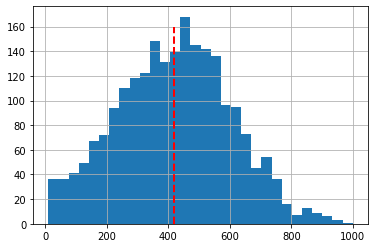

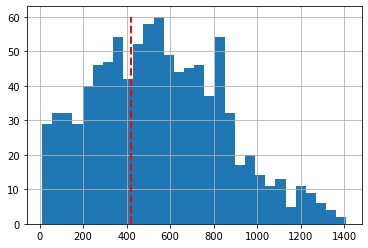

In [27]:
smart = smart_total.query('(calls_sum >= 10) and (calls_sum <= 1000)') 
ultra = ultra_total.query('(calls_sum >= 10) and (calls_sum <= 1500)') 
print('Кол-во строк для каждого тарифа:')
print('Smart:',len(smart))
print('Ultra:',len(ultra))

smart_minutes_mean = smart['calls_sum'].mean()
ultra_minutes_mean = ultra['calls_sum'].mean()
print('Среднее для каждого тарифа:')
print('Smart:',smart_minutes_mean)
print('Ultra:',ultra_minutes_mean)

smart_minutes_variance = np.var(smart['calls_sum'], ddof=1)
ultra_minutes_variance = np.var(ultra['calls_sum'], ddof=1)
print('Дисперсия для каждого тарифа:')
print('Smart:',smart_minutes_variance)
print('Ultra:',ultra_minutes_variance)

smart_minutes_std = np.std(smart['calls_sum'], ddof=1)
ultra_minutes_std = np.std(ultra['calls_sum'], ddof=1)
print('Стандартное отклонение для каждого тарифа:')
print('Smart:',smart_minutes_std)
print('Ultra:',ultra_minutes_std)

smart['calls_sum'].hist(bins = 30)
plt.vlines(smart_minutes_mean, 0, 160, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()
ultra['calls_sum'].hist(bins = 30)
plt.vlines(smart_minutes_mean, 0, 60, color = 'r', linestyle = 'dashed', linewidth = 2)

Кол-во строк для каждого тарифа:
Smart: 1915
Ultra: 760
Среднее для каждого тарифа:
Smart: 38.69295039164491
Ultra: 60.76842105263158
Медиана для каждого тарифа:
Smart: 34.0
Ultra: 52.0
Дисперсия для каждого тарифа:
Smart: 713.8670087932536
Ultra: 1935.2453782678037
Стандартное отклонение для каждого тарифа:
Smart: 26.718289780471608
Ultra: 43.99142391725692


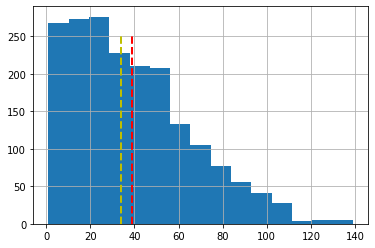

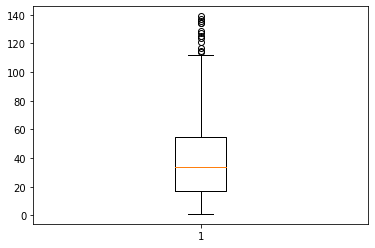

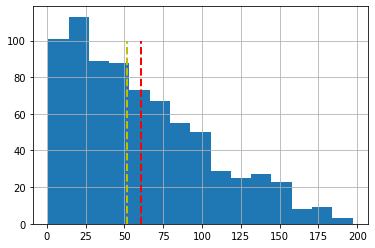

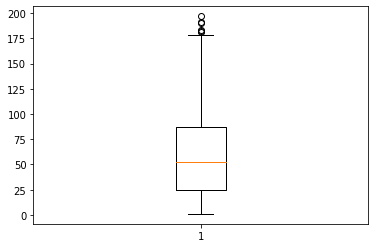

In [35]:
smart = smart_total.query('(messages_count > 0) and (messages_count <= 140)') 
ultra = ultra_total.query('(messages_count > 0) and (messages_count <= 200)') 
print('Кол-во строк для каждого тарифа:')
print('Smart:',len(smart))
print('Ultra:',len(ultra))

smart_messages_mean = smart['messages_count'].mean()
ultra_messages_mean = ultra['messages_count'].mean()
print('Среднее для каждого тарифа:')
print('Smart:',smart_messages_mean)
print('Ultra:',ultra_messages_mean)

smart_messages_median = smart['messages_count'].median()
ultra_messages_median = ultra['messages_count'].median()
print('Медиана для каждого тарифа:')
print('Smart:',smart_messages_median)
print('Ultra:',ultra_messages_median)

smart_messages_variance = np.var(smart['messages_count'], ddof=1)
ultra_messages_variance = np.var(ultra['messages_count'], ddof=1)
print('Дисперсия для каждого тарифа:')
print('Smart:',smart_messages_variance)
print('Ultra:',ultra_messages_variance)

smart_messages_std = np.std(smart['messages_count'], ddof=1)
ultra_messages_std = np.std(ultra['messages_count'], ddof=1)
print('Стандартное отклонение для каждого тарифа:')
print('Smart:',smart_messages_std)
print('Ultra:',ultra_messages_std)

smart['messages_count'].hist(bins = 15)
plt.vlines(smart_messages_mean, 0, 250, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.vlines(smart_messages_median, 0, 250, color = 'y', linestyle = 'dashed', linewidth = 2)
plt.show()
plt.boxplot(smart['messages_count'])
plt.show()

ultra['messages_count'].hist(bins = 15)
plt.vlines(ultra_messages_mean, 0, 100, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.vlines(ultra_messages_median, 0, 100, color = 'y', linestyle = 'dashed', linewidth = 2)
plt.show()
plt.boxplot(ultra['messages_count'])
plt.show()

### Анализ интернет-траффика

Кол-во строк для каждого тарифа:
Smart: 2215
Ultra: 940
Среднее для каждого тарифа:
Smart: 16189.894356659142
Ultra: 19708.508510638298
Дисперсия для каждого тарифа:
Smart: 33381299.265257202
Ultra: 99443831.9882129
Стандартное отклонение для каждого тарифа:
Smart: 5777.655170158323
Ultra: 9972.15282615609


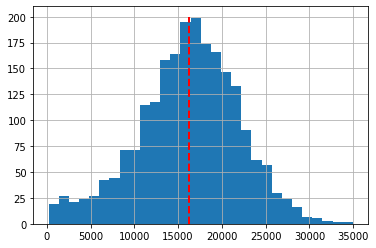

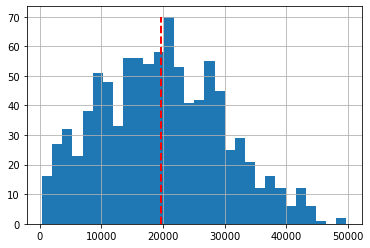

In [29]:
smart = smart_total.query('(mb_used_sum > 0) and (mb_used_sum <= 35000)') 
ultra = ultra_total.query('(mb_used_sum > 0) and (mb_used_sum <= 50000)') 
print('Кол-во строк для каждого тарифа:')
print('Smart:',len(smart))
print('Ultra:',len(ultra))

smart_mb_mean = smart['mb_used_sum'].mean()
ultra_mb_mean = ultra['mb_used_sum'].mean()
print('Среднее для каждого тарифа:')
print('Smart:',smart_mb_mean)
print('Ultra:',ultra_mb_mean)

smart_mb_variance = np.var(smart['mb_used_sum'], ddof=1)
ultra_mb_variance = np.var(ultra['mb_used_sum'], ddof=1)
print('Дисперсия для каждого тарифа:')
print('Smart:',smart_mb_variance)
print('Ultra:',ultra_mb_variance)

smart_mb_std = np.std(smart['mb_used_sum'], ddof=1)
ultra_mb_std = np.std(ultra['mb_used_sum'], ddof=1)
print('Стандартное отклонение для каждого тарифа:')
print('Smart:',smart_mb_std)
print('Ultra:',ultra_mb_std)

smart['mb_used_sum'].hist(bins = 30)
plt.vlines(smart_mb_mean, 0, 200, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()
ultra['mb_used_sum'].hist(bins = 30)
plt.vlines(ultra_mb_mean, 0, 70, color = 'r', linestyle = 'dashed', linewidth = 2)

In [37]:
print('Годовой доход с пользователей тарифа "Смарт":',smart_total['income'].sum())
print('Годовой доход с пользователей тарифа "Ультра":',ultra_total['income'].sum())

Годовой доход с пользователей тарифа "Смарт": 2880051
Годовой доход с пользователей тарифа "Ультра": 2258400


### Вывод
- среднее по количеству минут, количеству смс и использованных мегабайтов больше у представителей тарифа "Ультра"
- стандартное отклонение во всех случаях для "Ультра" больше, чем для "Смарт", следовательно получившиеся средние для "Ультра можно считать менее надежными
- гистограммы для "Ультра" получаются более шумными в связи с тем, что данных по этому тарифу в 2-2,5 раза меньше
- гистограммы для смс скошенны вправо 
- графики для звонков и расхода интернета по тарифу "Смарт" хорошо визуализируют нормальное распределение
- по каждому параметру представители тарифа "Ультра" расходуют больше ресурсов, так как на гистограммах мы видим больший размах значений

# 5. Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Нулевая гипотеза:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» равна;
- средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

Альтернативная гипотеза:
- средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»
- средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов

**Проверка первой гипотезы**

In [16]:
alpha = 0.05

results = st.ttest_ind(smart_total['income'], ultra_total['income'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.877066636375272e-179
Отвергаем нулевую гипотезу


**Проверка второй гипотезы**

In [17]:
results = st.ttest_ind(moscow_total['income'], regions_total['income'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07339985193631597
Не получилось отвергнуть нулевую гипотезу


Гипотезу о том, что средние выручки пользователей тарифов «Ультра» и «Смарт» равны мы отвергаем. <br>
Гипотезу о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, мы не отвергаем, ведь с вероятностью 7,3% среднее двух генеральных совокупностей по Москве и по регионам могут быть равны.

### 6. Общий вывод

- На основе проведенного анализа мы не можем однозначно ответить на вопрос, какой тариф лучше. Мы отвергли гипотезу о том, что выручка у двух тарифов равна. Значит, есть смысл говорить о том, что один из тарифов "грязными" приносит больше. О чистой прибыли мы судить не можем. <br>
- С точки зрения клиентов, право на существование имеют оба тарифа, так как "Смарт" представляет сегмент базовых тарифов, большинство пользователей которого не хотят тратить много на связь и не используют большой траффик. А тариф "Ультра" используют люди, которые в среднем звонят, отправляют смс и используют интернет в больших количествах. <br>
- Что касатеся данной выборки, пользователи тарифа "Смарт" принесли больше выручки
- Для более корректного вывода о том, зависит ли выручка пользователей от региона слудует взять стратифицированную выборку. Возможно, это изменит результаты исследования.